In [2]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import helper

Epoch 1/150


/Users/house/Desktop/machine learning/machineLearning/dnn/helper.py:13: RuntimeWarning: divide by zero encountered in log
  res = np.log(y)


107/107 [==============================] - 0s 1ms/step - loss: 104.9786 - val_loss: 54.6485
Epoch 2/150
107/107 [==============================] - 0s 1ms/step - loss: 55.3646 - val_loss: 43.0122
Epoch 3/150
107/107 [==============================] - 0s 1ms/step - loss: 49.7855 - val_loss: 43.1643
Epoch 4/150
107/107 [==============================] - 0s 1ms/step - loss: 45.9054 - val_loss: 42.6765
Epoch 5/150
107/107 [==============================] - 0s 1ms/step - loss: 42.5525 - val_loss: 36.4537
Epoch 6/150
107/107 [==============================] - 0s 1ms/step - loss: 40.7927 - val_loss: 33.9779
Epoch 7/150
107/107 [==============================] - 0s 1ms/step - loss: 38.1322 - val_loss: 32.9689
Epoch 8/150
107/107 [==============================] - 0s 1ms/step - loss: 36.9812 - val_loss: 31.3845
Epoch 9/150
107/107 [==============================] - 0s 1ms/step - loss: 36.6555 - val_loss: 31.0338
Epoch 10/150
107/107 [==============================] - 0s 1ms/step - loss: 36.8097 

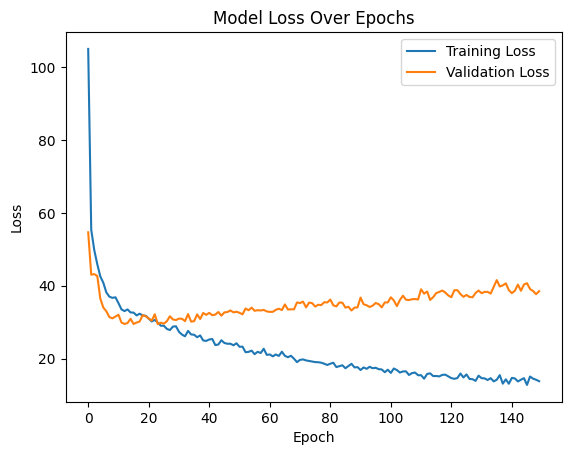

In [3]:
data = pd.read_csv('../input/preprocessed_data.csv')
X = data.drop('revenue', axis=1)
X = helper.data_standardizer(X)
y = data['revenue']
y = y.apply(helper.revenue_log)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.1),
#     Dense(64, activation='relu'),
#     Dropout(0.1),
#     Dense(64, activation='relu'),
#     Dropout(0.1),
#     Dense(64, activation='relu'),
#     Dropout(0.1),
#     Dense(64, activation='relu'),
#     Dropout(0.1),
#     Dense(32, activation='relu'),
#     Dropout(0.1),
#     Dense(1)  # Output layer with no activation function for regression
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')


# history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))


# test_loss = model.evaluate(X_test, y_test)
# predictions = model.predict(X_test)


# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Over Epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()




# raized the dropout to 0.3 from 0.1

Epoch 1/150
107/107 [==============================] - 0s 1ms/step - loss: 110.3938 - val_loss: 59.8954
Epoch 2/150
107/107 [==============================] - 0s 1ms/step - loss: 69.5970 - val_loss: 66.6858
Epoch 3/150
107/107 [==============================] - 0s 1ms/step - loss: 63.7570 - val_loss: 53.8893
Epoch 4/150
107/107 [==============================] - 0s 1ms/step - loss: 59.1634 - val_loss: 53.3308
Epoch 5/150
107/107 [==============================] - 0s 1ms/step - loss: 56.7321 - val_loss: 54.4902
Epoch 6/150
107/107 [==============================] - 0s 1ms/step - loss: 55.4966 - val_loss: 54.0579
Epoch 7/150
107/107 [==============================] - 0s 1ms/step - loss: 54.2337 - val_loss: 55.2668
Epoch 8/150
107/107 [==============================] - 0s 1ms/step - loss: 52.1003 - val_loss: 51.5444
Epoch 9/150
107/107 [==============================] - 0s 1ms/step - loss: 50.4497 - val_loss: 50.7202
Epoch 10/150
107/107 [==============================] - 0s 1ms/step - lo

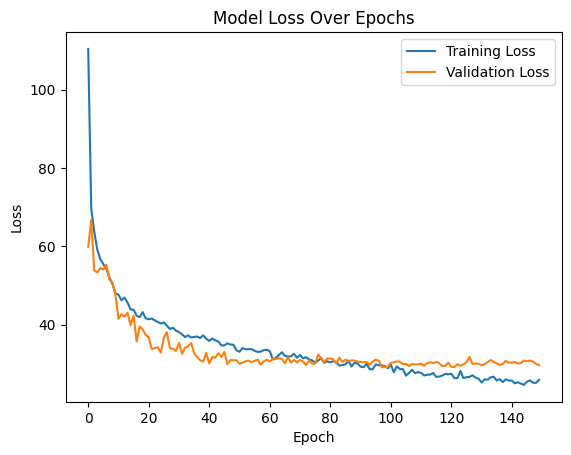

In [4]:
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.3),
#     Dense(1)  
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')


# history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))


# test_loss = model.evaluate(X_test, y_test)
# predictions = model.predict(X_test)


# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Over Epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()




In [5]:
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
#     Dropout(0.1),
#     Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(0.1),
#     Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(0.1),
#     Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
#     Dense(1)  # Output layer with no activation function for regression
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')

# # Early stopping monitor
# early_stopping_monitor = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     verbose=1,
#     restore_best_weights=True
# )

# history = model.fit(
#     X_train, y_train, 
#     epochs=150, 
#     batch_size=32, 
#     validation_data=(X_test, y_test),
#     callbacks=[early_stopping_monitor]
# )

# test_loss = model.evaluate(X_test, y_test)
# predictions = model.predict(X_test)

# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Over Epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()


Epoch 1/150
27/27 [==============================] - 1s 5ms/step - loss: 193.8898 - val_loss: 202.0866 - lr: 0.0050
Epoch 2/150
27/27 [==============================] - 0s 3ms/step - loss: 141.2897 - val_loss: 189.7307 - lr: 0.0050
Epoch 3/150
27/27 [==============================] - 0s 3ms/step - loss: 77.8117 - val_loss: 80.8346 - lr: 0.0050
Epoch 4/150
27/27 [==============================] - 0s 3ms/step - loss: 37.6928 - val_loss: 37.6839 - lr: 0.0050
Epoch 5/150
27/27 [==============================] - 0s 3ms/step - loss: 31.6389 - val_loss: 40.3429 - lr: 0.0050
Epoch 6/150
27/27 [==============================] - 0s 3ms/step - loss: 31.5438 - val_loss: 50.2071 - lr: 0.0050
Epoch 7/150
27/27 [==============================] - 0s 3ms/step - loss: 30.1090 - val_loss: 34.3432 - lr: 0.0050
Epoch 8/150
27/27 [==============================] - 0s 3ms/step - loss: 29.2499 - val_loss: 30.3443 - lr: 0.0050
Epoch 9/150
27/27 [==============================] - 0s 3ms/step - loss: 28.7680 - v

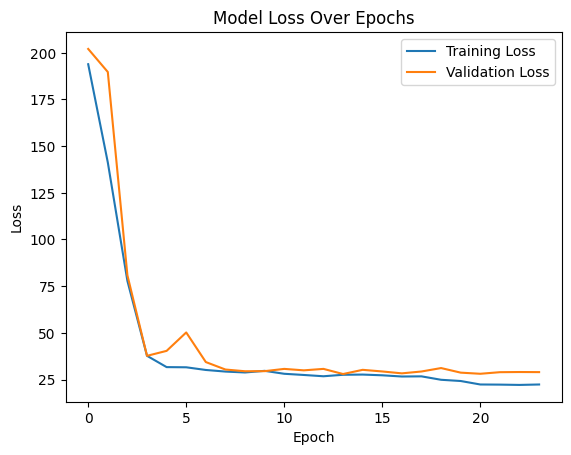

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)  # No activation for output layer
])

optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=128,  
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

test_loss = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
